In [2]:
 #importing the cifar10 dataset
from keras.datasets import cifar10

In [3]:
#preprocessing the data
import numpy as np
import cv2
import matplotlib.pyplot as plt

#finding the training and testing datasets from cifar10 dataset
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

#converting the images to gray scale
x_train = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in x_train])
x_test = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in x_test])

#printing the testing and training dataset shapes
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

#normalizing the images
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

170508288/170498071 [==============================] - 6s 0us/step
(50000, 32, 32)
(50000, 1)
(10000, 32, 32)
(10000, 1)


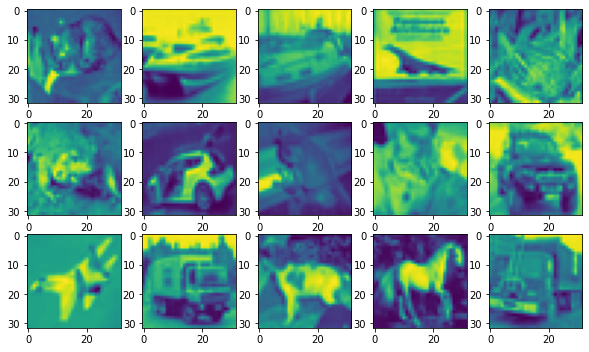

In [ ]:
#displaying the test data
def plot_data(data):
  plt.figure(figsize = (10,10))
  for i in range(15):
    plt.subplot(5,5,i+1)
    plt.imshow(data[i])

plot_data(x_test)

In [4]:
#reshaping the images from (10000,32,32) to (10000,1024).
train_input = x_train.reshape(len(x_train),-1)
test_input = x_test.reshape(len(x_test),-1)

print(train_input.shape)
print(test_input.shape)

(50000, 1024)
(10000, 1024)


In [5]:
from scipy.spatial.distance import cdist 

#recomputing centroids from oreviously obtained centroids
def recomputeCentroids(data, epochs, centers):
  number_of_centroids = 10
  while epochs > 0:
        classification = []
        for index in range(number_of_centroids):
            classification.append(data[centers==index].mean(axis=0))
        classification = np.vstack(classification)
        epochs -= 1
  return classification

#predicting the new cluster centers
def predict(classification, data):
  distances = cdist(data, classification ,'euclidean')
  cluster_centers = []
  for i in distances:
    cluster_centers.append(np.argmin(i))
  return cluster_centers

In [6]:
#defining the KMeans clustering algorithm 

def KMeans_Clustering_Algorithm(data, epochs):
    number_of_centroids = 10
    #selecting random points from dataset for initializing the centroids
    sample_points = np.random.choice(data.shape[0], number_of_centroids)

    #initializing the centroids
    #obtaining the unique points for centroids from dataset
    centroids_first = [tuple(data[id]) for id in sample_points]
    unique_centroids = list(set(centroids_first))

    #calculating the Euclidean distance
    euclidean_distances = cdist(data, unique_centroids ,'euclidean')
    
    #finding the clusters with respect to the centroids
    centroid_centers = np.array([np.argmin(i) for i in euclidean_distances])
    classification = recomputeCentroids(data, epochs, centroid_centers)
    new_centroids = predict(classification, data)
    return new_centroids

In [8]:
#calling the KMeans function with the test data
test_label = KMeans_Clustering_Algorithm(test_input,1900) 

#calculating the silhouette score
from sklearn.metrics import silhouette_score
silhouette = silhouette_score(test_input,test_label)
print("Average Silhouette Score is :" ,silhouette)

Average Silhouette Score is : 0.060753368


In [ ]:
!pip install validclust

#calculating the dunn's index
from sklearn.metrics import pairwise_distances
from validclust import dunn
dist = pairwise_distances(test_input)
print("\nDunns Index value is :" ,dunn(dist, test_label))


Dunns Index value is : 0.09541914


In [ ]:
import keras
from keras import layers
from keras.models import Model
from keras.layers import Dense, Input

In [ ]:
#function to display images before encoding (original images)
def autoencoder_inputs(autoencoder, data):
    plt.figure(figsize=(10, 4.5))
    print("Input images to autoencoder")
    for i in range(5):
        ax = plt.subplot(1, 5, i + 1)
        plt.imshow(data[i].reshape(32,32))
    plt.show()

In [ ]:
#function to display images after decoding (reconstructed images)
def autoencoder_outputs(autoencoder, data):
    reconstructed_images = autoencoder.predict(data)
    plt.figure(figsize=(10, 4.5))
    print("Reconstructed Images")
    for i in range(5):
        ax = plt.subplot(1, 5, i + 1)
        plt.imshow(reconstructed_images[i].reshape(32,32))
    plt.show()

In [ ]:
#autoencoder with one hidden layer
input_images = Input(shape=(1024,))

#encoding input images
shallow_hidden_layer = Dense(32, activation='relu')(input_images)
compressed = Dense(32, activation='relu')(shallow_hidden_layer)

#decoding of compressed images
decode_hidden_layer = Dense(32, activation='relu')(compressed)
reconstructed_images = Dense(1024, activation='sigmoid')(decode_hidden_layer)

# Mapping input to its reconstructed representation
shallow_autoencoder = Model(input_images, reconstructed_images)
shallow_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
shallow_autoencoder.fit(train_input, train_input, epochs=15)

# Mapping input to the shallow encoded representation
shallow_encoder = Model(input_images, compressed)
shallow_encoded_images = shallow_encoder.predict(test_input)

Epoch 1/15
1563/1563 [==============================] - 9s 4ms/step - loss: 0.6211
Epoch 2/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6043
Epoch 3/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6014
Epoch 4/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6006
Epoch 5/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6004
Epoch 6/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6003
Epoch 7/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6002
Epoch 8/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6000
Epoch 9/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5998
Epoch 10/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5997
Epoch 11/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5997
Epoch 12/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5986
E

Input images to autoencoder


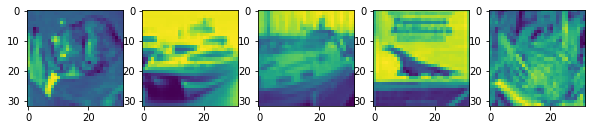

In [ ]:
#plotting autoencoder input images
autoencoder_inputs(shallow_autoencoder, test_input)

Reconstructed Images


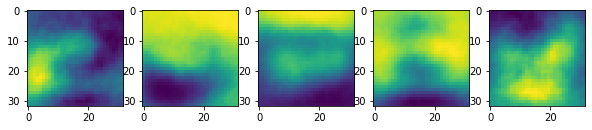

In [ ]:
#plotting autoencoder output images
autoencoder_outputs(shallow_autoencoder, test_input)

In [ ]:
shallow_label = KMeans_Clustering_Algorithm(shallow_encoded_images,1900)

In [ ]:
shallow_silhouette_score = silhouette_score(shallow_encoded_images, shallow_label)
print("Average Silhouette Score is :", shallow_silhouette_score)

Average Silhouette Score is : 0.08014249


In [ ]:
dist = pairwise_distances(shallow_encoded_images)
print("\nDunns Index value is :" ,dunn(dist, shallow_label))


Dunns Index value is : 0.022460269


In [ ]:
#autoencoder with two hidden layers

input_images = Input(shape=(1024,))

#encoding input images
deep_hidden_layer = layers.Dense(128, activation='relu')(input_images)
deep_hidden_layer = layers.Dense(64, activation='relu')(deep_hidden_layer)
compressed = layers.Dense(32, activation='relu')(deep_hidden_layer)

#decoding of compressed images
decode_hidden_layer = layers.Dense(64, activation='relu')(compressed)
decode_hidden_layer = layers.Dense(128, activation='relu')(decode_hidden_layer)
reconstructed_images = layers.Dense(1024, activation='sigmoid')(decode_hidden_layer)

# Mapping input to its reconstructed representation
#deep_autoencoder = keras.Model(input_images, decode_hidden_layer)
deep_autoencoder = keras.Model(input_images, reconstructed_images)
deep_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
deep_autoencoder.fit(train_input, train_input, epochs=20)

# Mapping input to the deep encoded representation
deep_encoder = keras.Model(input_images, compressed)
deep_encoded_images = deep_encoder.predict(test_input)

Epoch 1/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6152
Epoch 2/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5994
Epoch 3/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5962
Epoch 4/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5939
Epoch 5/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5930
Epoch 6/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5923
Epoch 7/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5917
Epoch 8/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5914
Epoch 9/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5909
Epoch 10/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5906
Epoch 11/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5905
Epoch 12/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5902
E

Input images to autoencoder


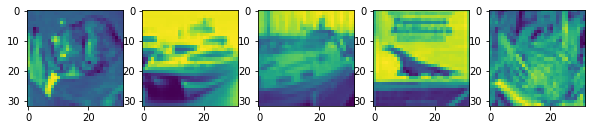

In [ ]:
#plotting autoencoder input images
autoencoder_inputs(deep_autoencoder, test_input)

Reconstructed Images


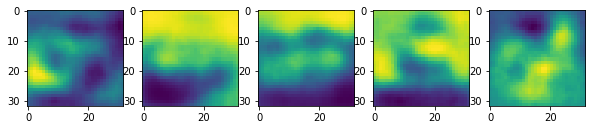

In [ ]:
#plotting autoencoder output images
autoencoder_outputs(deep_autoencoder, test_input)

In [ ]:
deep_encoded_label = KMeans_Clustering_Algorithm(deep_encoded_images,1900)

In [ ]:
deep_silhouette_score = silhouette_score(deep_encoded_images, deep_encoded_label)
print("Average Silhouette Score is :", deep_silhouette_score)

Average Silhouette Score is : 0.07122681


In [ ]:
dist = pairwise_distances(deep_encoded_images)
print("\nDunns Index value is :" ,dunn(dist, deep_encoded_label))


Dunns Index value is : 0.041129354


In [ ]:
from keras.regularizers import l1
#autoencoder with regularizer

input_images = Input(shape=(1024,))
#encoding input images
compressed = layers.Dense(32, activation='relu', activity_regularizer=l1(10e-6))(input_images)

#reconstructing the input images
reconstructed_images = layers.Dense(1024, activation='sigmoid')(compressed)

# Mapping input to its reconstructed representation
sparse_autoencoder = keras.Model(input_images, reconstructed_images)
sparse_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
sparse_autoencoder.fit(train_input, train_input, epochs=20)

# Mapping input to the deep encoded representation
sparse_encoder = keras.Model(input_images, compressed)
sparse_encoded_images = sparse_encoder.predict(test_input)

Epoch 1/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6288
Epoch 2/20
1563/1563 [==============================] - 5s 4ms/step - loss: 0.6059
Epoch 3/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6036
Epoch 4/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6023
Epoch 5/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6016
Epoch 6/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6013
Epoch 7/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6012
Epoch 8/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6011
Epoch 9/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6011
Epoch 10/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6010
Epoch 11/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6010
Epoch 12/20
1563/1563 [==============================] - 5s 4ms/step - loss: 0.6009
E

Input images to autoencoder


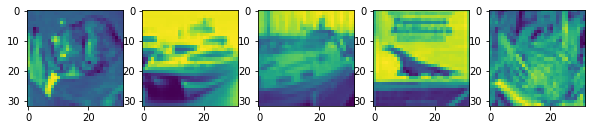

In [ ]:
#plotting autoencoder input images
autoencoder_inputs(sparse_autoencoder, test_input)

Reconstructed Images


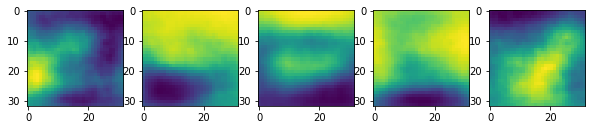

In [ ]:
#plotting autoencoder output images
autoencoder_outputs(sparse_autoencoder, test_input)

In [ ]:
sparse_encoded_label = KMeans_Clustering_Algorithm(sparse_encoded_images,1900)

In [ ]:
sparse_silhouette_score = silhouette_score(sparse_encoded_images, sparse_encoded_label)
print("Average Silhouette Score is :", sparse_silhouette_score)

Average Silhouette Score is : 0.08813908


In [ ]:
dist = pairwise_distances(sparse_encoded_images)
print("\nDunns Index value is :" ,dunn(dist, sparse_encoded_label))


Dunns Index value is : 0.037002686
